In [15]:
import pandas as pd

data = pd.read_csv('room_price.txt',names=['Size', 'Price']) # 读取数据
data.head(5) # 查看前 5 行

,Size,Price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


<Axes: xlabel='Size', ylabel='Price'>

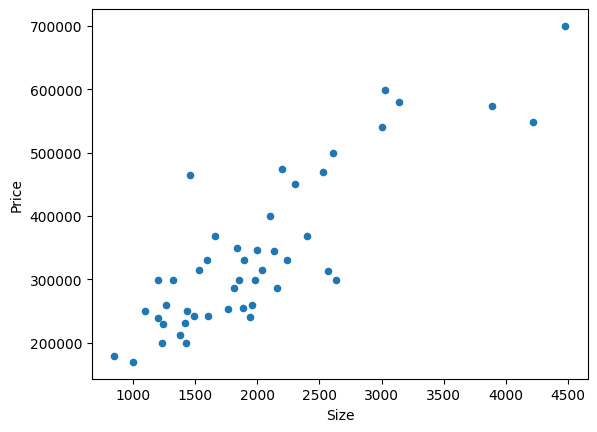

In [14]:
data.plot(kind='scatter', x='Size', y='Price')

In [16]:
import torch

size = torch.Tensor(data.Size)
price = torch.Tensor(data.Price)

# print(size)
# print(price)

# price = size * w + b
w = torch.rand(size=[1], requires_grad=True)
b = torch.rand(size=[1], requires_grad=True)

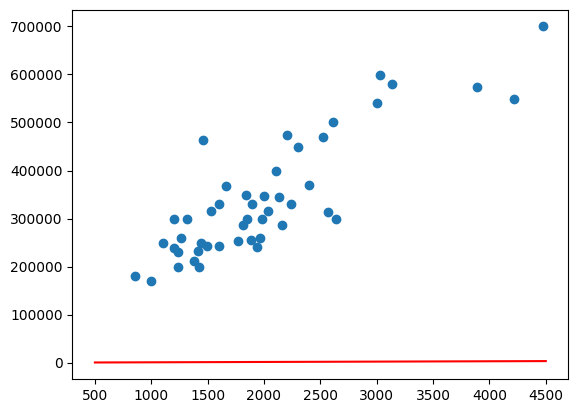

In [18]:
import matplotlib.pyplot as plt

plt.scatter(data.Size, data.Price)
x = range(500,5000,500)
y = [item*w.item()+b.item() for item in x]
plt.plot(x,y, color='red')
plt.show()

In [5]:
def loss_func(curr,real): # 计算绝对值的均值
    temp = torch.abs(curr-real)
    return torch.mean(temp)

epoch = 20
loss_arr =[]
for epoch in range(epoch):
    res = size*w+b # 计算模型预测值
    loss = loss_func(res, price)
    w.grad=None
    b.grad=None
    loss.backward() # 触发梯度计算
    w.data -=w.grad.data * 0.01
    b.data -=b.grad.data * 0.01
    loss_arr.append(loss.item())

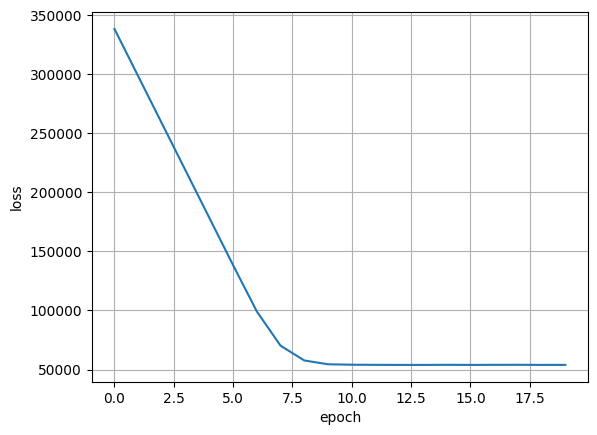

In [19]:
plt.plot(range(epoch+1), loss_arr)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)

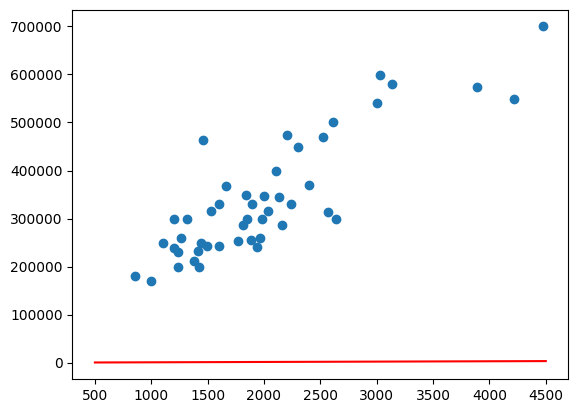

In [21]:
plt.scatter(data.Size, data.Price)
x = range(500,5000,500)
y = [item*w.item()+b.item() for item in x]
plt.plot(x,y, color='red')
plt.show()